In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('Store Sales.csv')

In [4]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Fill the missing values on all essential features

In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


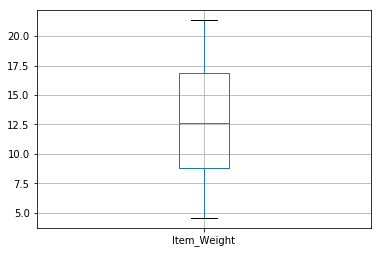

In [11]:
data.boxplot(column='Item_Weight')

### Fill Item_Weight with Mean

In [12]:
data['Item_Weight'].isna().sum()

1463

In [13]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [14]:
data['Item_Weight'].isna().sum()

0

### Fill Outlet_Size with mode

In [15]:
data['Outlet_Size'].isna().sum()

2410

In [16]:
data[data['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [17]:
data[data['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

#### Finding correlation between Outlet_Type and Outlet_Size

In [18]:
d1  = pd.DataFrame(columns = ['Outlet_Type', 'Outlet_Size'])

d1['Outlet_Type'] = data['Outlet_Type'].astype('category').cat.codes
d1['Outlet_Size'] = data['Outlet_Size'].astype('category').cat.codes

d1['Outlet_Type'].corr(d1['Outlet_Size'])

0.15875482195404958

In [19]:
d1 = d1[d1['Outlet_Size']!=-1]
d1['Outlet_Type'].corr(d1['Outlet_Size'])

-0.2970530062274466

**EDA on Outlet_Type & Outlet_Size**

In [20]:
data['Outlet_Type'].value_counts(dropna=False)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
data['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
data.groupby(['Outlet_Type', 'Outlet_Size'])['Outlet_Type','Outlet_Size'].size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [23]:
data.loc[data['Outlet_Size'].isna(),['Outlet_Type','Outlet_Size']].groupby('Outlet_Type').size()

Outlet_Type
Grocery Store         555
Supermarket Type1    1855
dtype: int64

#### From above observations, it is found that when Outlet_Type is 'Grocery Store', Outlet_Size is always Small. When Outlet_Type is 'Supermarket Type1', maximum occurance of Outlet_Size is 'Small'.
#### So, replace na values with **'Small'**

In [24]:
data['Outlet_Size'].fillna('Small', inplace=True)
data['Outlet_Size'].isna().sum()

0

**Cross checking whether all na values are filled**

In [25]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## EDA on Fat_Content

In [26]:
data['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat, LF, low fat refers to **Low Fat**. So, all the three can be merged.

Regular, reg can be merged to **Regular**.

In [27]:
data['Item_Fat_Content'].replace({'LF|Low Fat|low fat':'LowFat', 'reg':'Regular'}, regex=True, inplace=True)
data['Item_Fat_Content'].value_counts(dropna=False)

LowFat     5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Dropping the outliers by percentile (5% sales volume)

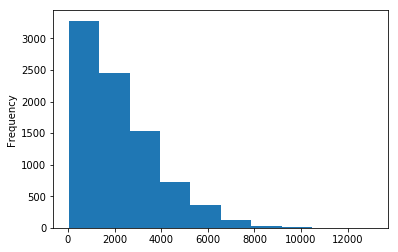

In [28]:
data['Item_Outlet_Sales'].plot(kind='hist')

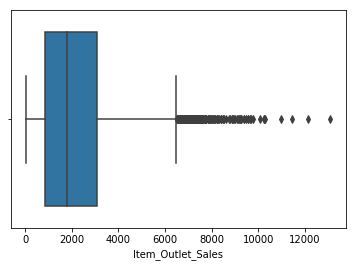

In [31]:
sns.boxplot(x=data['Item_Outlet_Sales'])

**Getting 5% quantile of Item_Outlet_Sales and remove the data which which falls under it**

In [32]:
q1 = data['Item_Outlet_Sales'].quantile(0.05)
q2 = data['Item_Outlet_Sales'].quantile(0.95)

print(q1, q2)

188.4214 5522.811


Before removing the outliers data

In [33]:
data.shape

(8523, 12)

After removing the outliers data

In [34]:
data = data[(data['Item_Outlet_Sales'] > q1) & (data['Item_Outlet_Sales'] < q2)]
data.shape

(7665, 12)

## Bin by year and advise which year bin has lower sales 1980 - 1990, 1991 - 2000, 2001 - 2010

In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
data.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year'])['Outlet_Identifier', 'Outlet_Establishment_Year'].size()

Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                         348
OUT013             1987                         885
OUT017             2007                         880
OUT018             2009                         887
OUT019             1985                         351
OUT027             1985                         754
OUT035             2004                         884
OUT045             2002                         894
OUT046             1997                         893
OUT049             1999                         889
dtype: int64

In [40]:
data['Outlet_Identifier'].value_counts()

OUT045    894
OUT046    893
OUT049    889
OUT018    887
OUT013    885
OUT035    884
OUT017    880
OUT027    754
OUT019    351
OUT010    348
Name: Outlet_Identifier, dtype: int64

In [48]:
data['Outlet_Establishment_Year'].dtype

dtype('int64')

In [51]:
bins = [1980, 1990, 2000, 2010, np.inf]
names = ['1980-1990', '1990-2000', '2001-2010', '>2010']
data['Outlet_Establishment_Year'] = pd.cut(data['Outlet_Establishment_Year'], bins, labels=names)

data['Outlet_Establishment_Year'].value_counts(dropna=False)

2001-2010    3545
1990-2000    2130
1980-1990    1990
>2010           0
Name: Outlet_Establishment_Year, dtype: int64

In [53]:
data.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1980-1990    2129.272564
1990-2000    1878.633471
2001-2010    2094.442651
>2010                NaN
Name: Item_Outlet_Sales, dtype: float64

**From above observation, it is observed that sales are lowest for the year 1990-2000**

## One hot encoding (Fat Content)

In [54]:
data['Item_Fat_Content'].value_counts()

LowFat     4967
Regular    2698
Name: Item_Fat_Content, dtype: int64

In [59]:
fat_content_encoded = pd.get_dummies(data['Item_Fat_Content'],prefix='Fat')

Now, remove the Item_Fat_Content column and append **fat_content_encoded** DF to **data** DF

In [60]:
data.drop(columns=['Item_Fat_Content'], inplace=True)
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [64]:
data = pd.concat([data, fat_content_encoded], axis=1)
data.head(1).T

,0
Item_Identifier,FDA15
Item_Weight,9.3
Item_Visibility,0.0160473
Item_Type,Dairy
Item_MRP,249.809
Outlet_Identifier,OUT049
Outlet_Establishment_Year,1990-2000
Outlet_Size,Medium
Outlet_Location_Type,Tier 1
Outlet_Type,Supermarket Type1
